In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import yfinance as yf
import datetime

In [3]:
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2017-01-01')

In [4]:
#import the data from yahoo finance for the following companies cisco, ibm, amazon and apple
#the data should extract the date and close price of the stock
cisco = yf.download('CSCO', start=start, end=end, progress=False)
ibm = yf.download('IBM', start=start, end=end, progress=False)
amazon = yf.download('AMZN', start=start, end=end, progress=False)
apple = yf.download('AAPL', start=start, end=end, progress=False)



In [5]:
apple

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.447412,6.462174,6.398306,6.429939,493729600
2010-01-05,6.458559,6.495012,6.424516,6.465187,601904800
2010-01-06,6.355828,6.484168,6.349200,6.458560,552160000
2010-01-07,6.344078,6.386859,6.297984,6.379327,477131200
2010-01-08,6.386255,6.386858,6.298286,6.335642,447610800
...,...,...,...,...,...
2016-12-23,26.977627,26.977627,26.762306,26.762306,56998000
2016-12-27,27.148960,27.273985,26.970683,26.977628,73187600


In [6]:
#Extract the Date and close price of the stock
cisco = cisco[['Close']]
ibm = ibm[['Close']]
amazon = amazon[['Close']]
apple = apple[['Close']]

In [7]:
cisco

Price,Close
Ticker,CSCO
Date,
2010-01-04,16.475370
2010-01-05,16.401970
2010-01-06,16.295204
2010-01-07,16.368610
2010-01-08,16.455353
...,...
2016-12-23,23.806553
2016-12-27,23.923525


In [8]:
apple.iloc[0]['Close']

Ticker
AAPL    6.447412
Name: 2010-01-04 00:00:00, dtype: float64

In [9]:
for stock_df in (cisco, ibm, amazon, apple):
    stock_df['Normed Return'] = stock_df['Close'] / stock_df.iloc[0]['Close']

C:\Users\allif\AppData\Local\Temp\ipykernel_6692\1751259816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Normed Return'] = stock_df['Close'] / stock_df.iloc[0]['Close']


In [10]:
apple.head()

Price,Close,Normed Return
Ticker,AAPL,
Date,,
2010-01-04,6.447412,1.000000
2010-01-05,6.458559,1.001729
2010-01-06,6.355828,0.985795
2010-01-07,6.344078,0.983973
2010-01-08,6.386255,0.990515


In [12]:
apple.tail()

Price,Close,Normed Return
Ticker,AAPL,
Date,,
2016-12-23,26.977627,4.184257
2016-12-27,27.148960,4.210831
2016-12-28,27.033194,4.192875
2016-12-29,27.026249,4.191798
2016-12-30,26.815554,4.159119


In [13]:
# 20% in cisco
# 30% in Apple
# 40% in Amazon
# 10% in IBM
for stock_df, allo in zip((cisco, ibm, amazon, apple),[.2,.1,.4,.3]):   #zip is used to iterate over two lists at the same time
    stock_df['Allocation'] = stock_df['Normed Return'] * allo           #multiply the normalized return by the allocation
    

C:\Users\allif\AppData\Local\Temp\ipykernel_6692\4114716638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Allocation'] = stock_df['Normed Return'] * allo           #multiply the normalized return by the allocation


In [14]:
apple.head()

Price,Close,Normed Return,Allocation
Ticker,AAPL,,
Date,,,
2010-01-04,6.447412,1.000000,0.300000
2010-01-05,6.458559,1.001729,0.300519
2010-01-06,6.355828,0.985795,0.295739
2010-01-07,6.344078,0.983973,0.295192
2010-01-08,6.386255,0.990515,0.297154


In [15]:
#Assuming we have 1 million dollars to invest
for stock_df in (cisco, ibm, amazon, apple):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

C:\Users\allif\AppData\Local\Temp\ipykernel_6692\2367833560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Position Values'] = stock_df['Allocation']*1000000


In [16]:
apple.head()

Price,Close,Normed Return,Allocation,Position Values
Ticker,AAPL,,,
Date,,,,
2010-01-04,6.447412,1.000000,0.300000,300000.000000
2010-01-05,6.458559,1.001729,0.300519,300518.674263
2010-01-06,6.355828,0.985795,0.295739,295738.559653
2010-01-07,6.344078,0.983973,0.295192,295191.840549
2010-01-08,6.386255,0.990515,0.297154,297154.358233


In [17]:
all_pos_vals = [cisco['Position Values'], ibm['Position Values'], amazon['Position Values'], apple['Position Values']]  #list of all the position values
portfolio_val = pd.concat(all_pos_vals, axis=1)   #concatenate the position values to form a dataframe


In [18]:
portfolio_val.head()   #display the first 5 rows of the dataframe

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2010-01-04,200000.000000,100000.000000,400000.000000,300000.000000
2010-01-05,199108.966953,98791.993861,402359.955708,300518.674263
2010-01-06,197812.902046,98150.265912,395070.949735,295738.559653
2010-01-07,198704.004555,97810.509123,388349.504606,295191.840549
2010-01-08,199756.999407,98791.993861,398864.821334,297154.358233


In [19]:
#rename the columns of the dataframe
portfolio_val.columns = ['CSCO Pos', 'IBM Pos', 'AMZN Pos', 'AAPL Pos']

In [20]:
portfolio_val.head() #display the first 5 rows of the dataframe

,CSCO Pos,IBM Pos,AMZN Pos,AAPL Pos
Date,,,,
2010-01-04,200000.000000,100000.000000,400000.000000,300000.000000
2010-01-05,199108.966953,98791.993861,402359.955708,300518.674263
2010-01-06,197812.902046,98150.265912,395070.949735,295738.559653
2010-01-07,198704.004555,97810.509123,388349.504606,295191.840549
2010-01-08,199756.999407,98791.993861,398864.821334,297154.358233


In [21]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)  #sum the total position values of all the stocks

In [23]:
portfolio_val.head()  #display the first 5 rows of the dataframe

,CSCO Pos,IBM Pos,AMZN Pos,AAPL Pos,Total Pos
Date,,,,,
2010-01-04,200000.000000,100000.000000,400000.000000,300000.000000,1.000000e+06
2010-01-05,199108.966953,98791.993861,402359.955708,300518.674263,1.000780e+06
2010-01-06,197812.902046,98150.265912,395070.949735,295738.559653,9.867727e+05
2010-01-07,198704.004555,97810.509123,388349.504606,295191.840549,9.800559e+05
2010-01-08,199756.999407,98791.993861,398864.821334,297154.358233,9.945682e+05


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

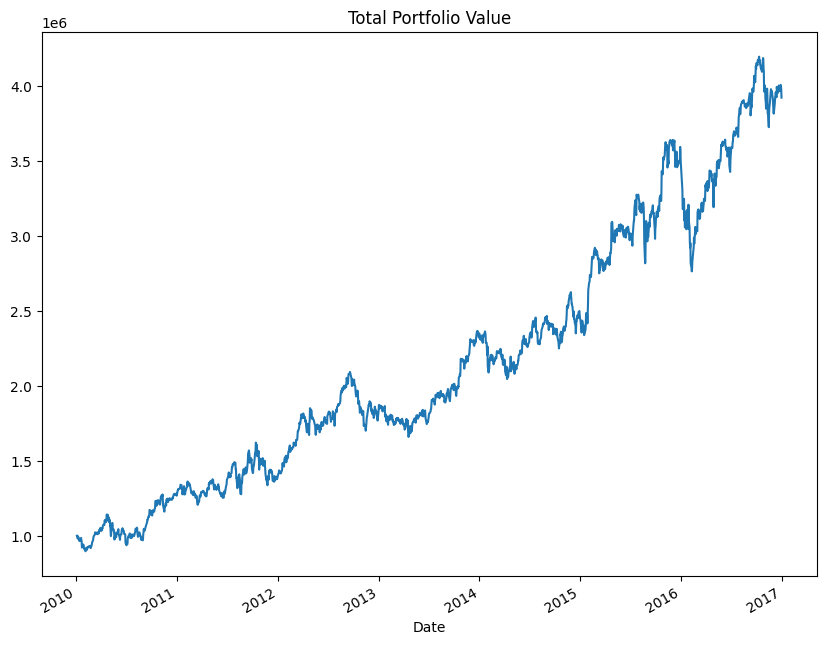

In [25]:
portfolio_val['Total Pos'].plot(figsize=(10,8)) #plot the total position values of the stocks
plt.title('Total Portfolio Value') #set the title of the plot
plt.show()  #display the plot


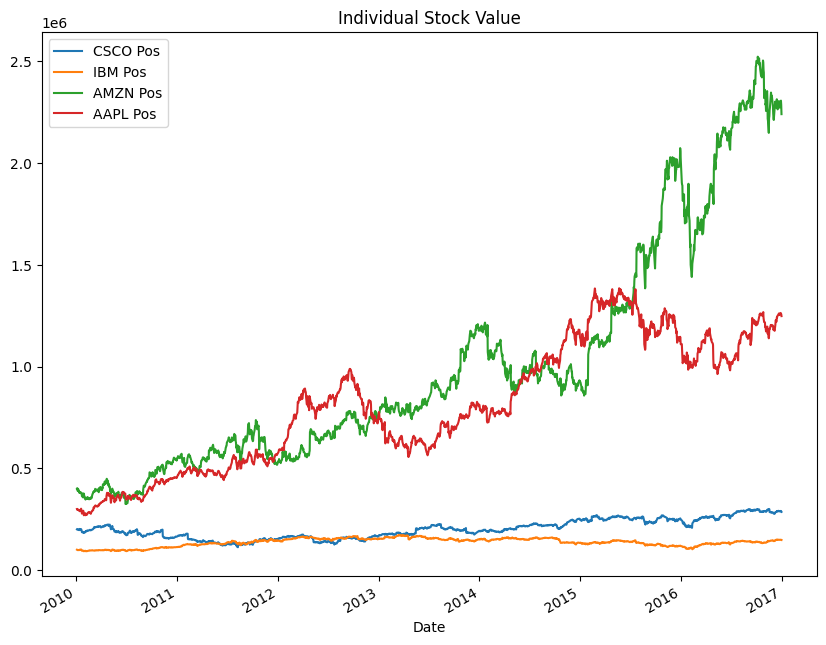

In [26]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(10,8))  #plot the position values of the individual stocks
plt.title('Individual Stock Value')  #set the title of the plot
plt.show()  #display the plot


Portfolio Status

In [27]:
portfolio_val.head() #display the first 5 rows of the dataframe

,CSCO Pos,IBM Pos,AMZN Pos,AAPL Pos,Total Pos
Date,,,,,
2010-01-04,200000.000000,100000.000000,400000.000000,300000.000000,1.000000e+06
2010-01-05,199108.966953,98791.993861,402359.955708,300518.674263,1.000780e+06
2010-01-06,197812.902046,98150.265912,395070.949735,295738.559653,9.867727e+05
2010-01-07,198704.004555,97810.509123,388349.504606,295191.840549,9.800559e+05
2010-01-08,199756.999407,98791.993861,398864.821334,297154.358233,9.945682e+05


In [28]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)  #calculate the daily return of the portfolio

In [29]:
portfolio_val.head()  #display the first 5 rows of the dataframe

,CSCO Pos,IBM Pos,AMZN Pos,AAPL Pos,Total Pos,Daily Return
Date,,,,,,
2010-01-04,200000.000000,100000.000000,400000.000000,300000.000000,1.000000e+06,NaN
2010-01-05,199108.966953,98791.993861,402359.955708,300518.674263,1.000780e+06,0.000780
2010-01-06,197812.902046,98150.265912,395070.949735,295738.559653,9.867727e+05,-0.013996
2010-01-07,198704.004555,97810.509123,388349.504606,295191.840549,9.800559e+05,-0.006807
2010-01-08,199756.999407,98791.993861,398864.821334,297154.358233,9.945682e+05,0.014808


In [30]:
portfolio_val['Daily Return'].mean()  #calculate the mean of the daily return

0.0008724919605965361

In [31]:
portfolio_val['Daily Return'].std()  #calculate the standard deviation of the daily return

0.013876441001539029

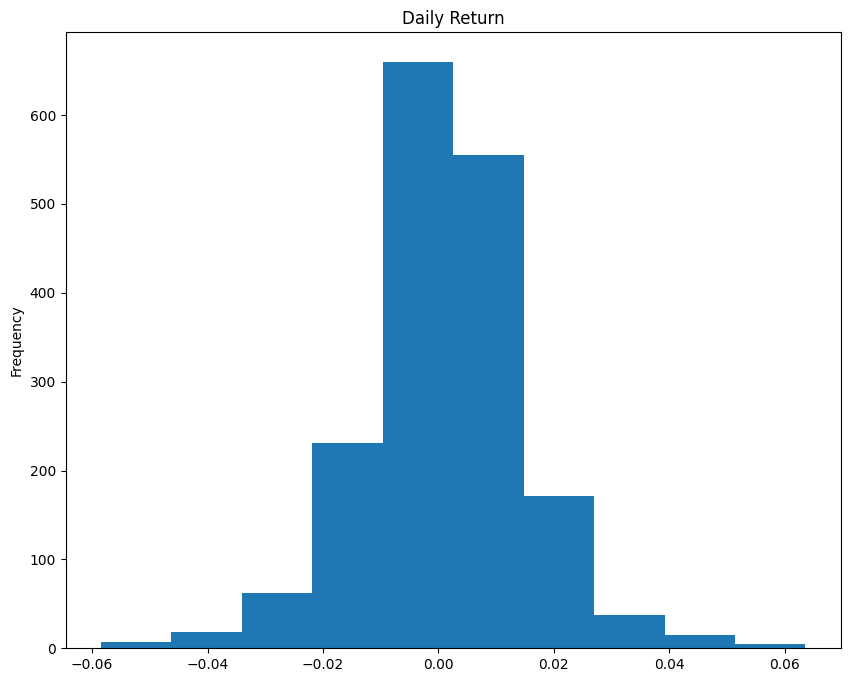

In [34]:
portfolio_val['Daily Return'].plot(kind='hist', figsize=(10,8))  #plot the kernel density estimation of the daily return
plt.title('Daily Return')  #set the title of the plot
plt.show()  #display the plot

<Axes: ylabel='Density'>

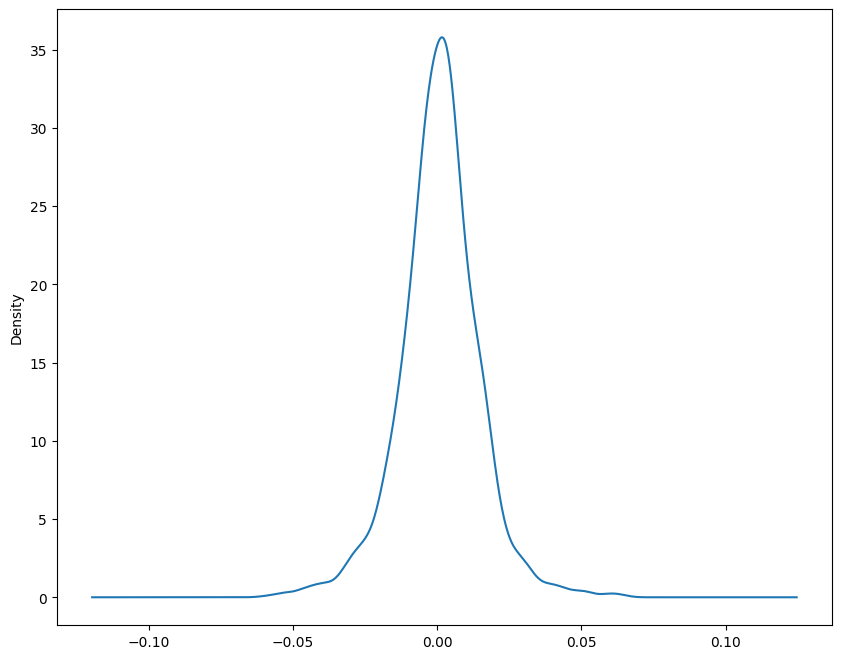

In [35]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(10,8))  #plot the kernel density estimation of the daily return

In [36]:
cummulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] - 1)  #calculate the cummulative return of the portfolio

C:\Users\allif\AppData\Local\Temp\ipykernel_6692\2950715065.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cummulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] - 1)  #calculate the cummulative return of the portfolio


In [37]:
cummulative_return  #display the cummulative return of the portfolio

292.17144687500564

In [38]:
portfolio_val['Total Pos'][-1]  #display the total position value of the portfolio

C:\Users\allif\AppData\Local\Temp\ipykernel_6692\731232439.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  portfolio_val['Total Pos'][-1]  #display the total position value of the portfolio


3921714.468750057

In [39]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()  #calculate the sharpe ratio of the portfolio

In [40]:
SR #display the sharpe ratio of the portfolio

0.06287577344217933

In [41]:
ASR = (252**0.5) * SR  #calculate the annualized sharpe ratio of the portfolio


In [42]:
ASR #display the annualized sharpe ratio of the portfolio

0.9981219601130769